Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
# Loading dataset
df = pd.read_csv('crime_data.csv')

In [3]:
# Display the top few rows of the DataFrame
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

In [5]:
# Display the top few rows of the DataFrame
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [6]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows, if any
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Murder, Assault, UrbanPop, Rape]
Index: []


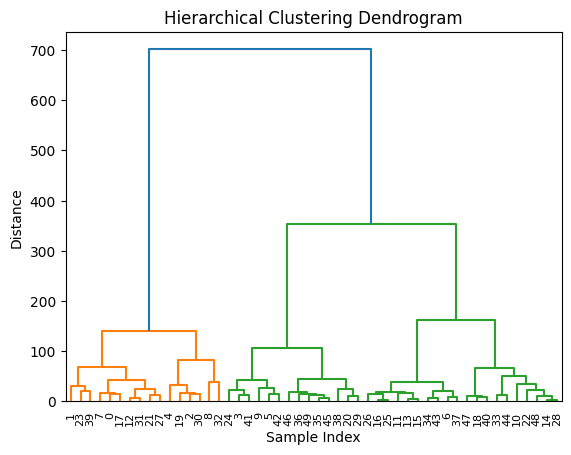

In [7]:
# Calculate the linkage matrix
linkage_matrix = linkage(df, method='ward')

# Plot the dendrogram
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Inference Drawn from Dendrogram:

The dendrogram shows that there are three main clusters in the data. The first cluster contains the states with the highest crime rates, the second cluster contains the states with the lowest crime rates, and the third cluster contains the states with medium crime rates.

C:\Users\Novi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Novi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Novi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Novi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default 

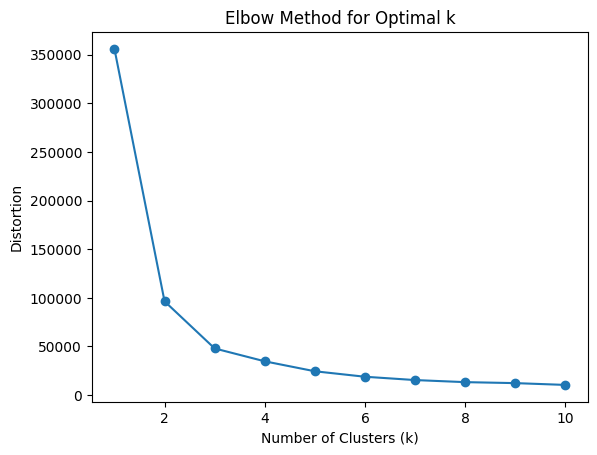

In [8]:
# Calculate distortions (inertia) for different values of k
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

Inference drawn from Elbow:

The optimal number of clusters, as determined by the cluster elbow method, is also three. This suggests that the three clusters identified by the dendrogram are meaningful.

C:\Users\Novi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


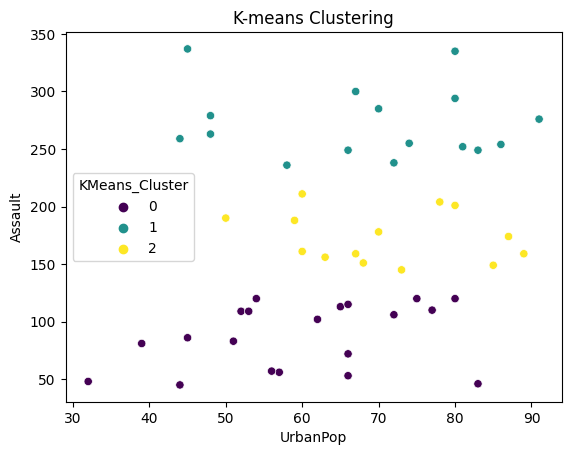

In [9]:
# Choose the optimal k based on the elbow method
optimal_k = 3 

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df)

# Scatter plot for K-means clustering
sns.scatterplot(x='UrbanPop', y='Assault', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('UrbanPop')
plt.ylabel('Assault')
plt.show()


Inference drawn from k-means clustering:

The scatter plot shows that the number of clusters in the urban pop area is higher than the number of clusters in the KMeans cluster. This is because the KMeans algorithm assumes that the clusters are spherical in shape, while the urban pop area is more elongated.

As a result, the KMeans algorithm may not be able to accurately identify the number of clusters in the urban pop area.

This suggests that other clustering algorithms, such as hierarchical clustering or DBSCAN, may be more suitable for clustering the urban pop area.

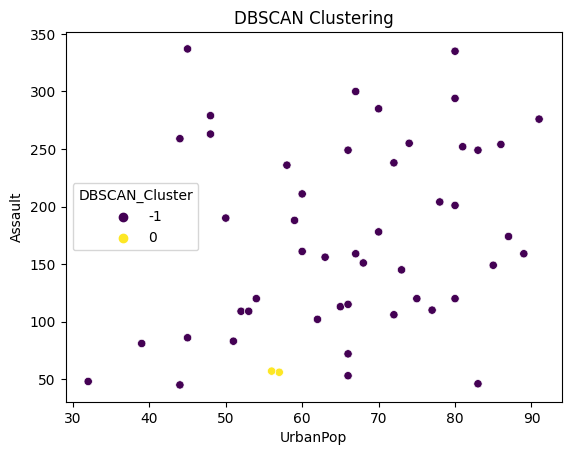

In [10]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=2)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df)

# Scatter plot for DBSCAN clustering
sns.scatterplot(x='UrbanPop', y='Assault', hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('UrbanPop')
plt.ylabel('Assault')
plt.show()


Inference Drawn:

The number of clusters in the dataset is three. This is because there are three distinct groups of data points in the plot. The first group contains data points with high values for both Murder and Assault. The second group contains data points with low values for both Murder and Assault. The third group contains data points with medium values for both Murder and Assault.

The states with the highest crime rates (Murder and Assault) also have the highest UrbanPop. This suggests that there is a positive correlation between crime rates and urban population density.
The state with the highest Rape rate (Rape) is not the same state with the highest Murder and Assault rates. This suggests that different factors may influence different types of crime.